In [1]:
import mne

In [2]:
import matplotlib.pyplot as plt

In [3]:
fname = "s01.bdf"

In [4]:
%matplotlib notebook

In [5]:
raw = mne.io.read_raw_bdf(fname, stim_channel="Status", preload=True)

Extracting EDF parameters from C:\Users\haide\mne-tests\mne-on-Deap\S01\s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...


In [40]:
raw.filter(4, 45)   #raw.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.5s finished


<RawEDF | s01.bdf, 48 x 1980928 (3869.0 s), ~725.5 MB, data loaded>

In [41]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'GSR1',
 'GSR2',
 'Erg1',
 'Erg2',
 'Resp',
 'Plet',
 'Temp',
 'Status']

In [42]:
raw_temp=raw.copy()

In [43]:
raw_temp.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 
'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 
'Plet','Temp'])

<RawEDF | s01.bdf, 33 x 1980928 (3869.0 s), ~498.8 MB, data loaded>

In [44]:
raw_temp.info["ch_names"]

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'Status']

In [45]:
mne.find_events(raw_temp, initial_event=True)

13761 events found
Event IDs: [    1     2     3     4     5     6     7 65536]


array([[      0,       0,   65536],
       [   1960,       0,       1],
       [   1972,       0,       1],
       ...,
       [1880153,       0,       1],
       [1880162,       0,       2],
       [1880691,       0,       7]], dtype=int64)

In [46]:
plt.rcParams["figure.figsize"]=10, 10

<IPython.core.display.Javascript object>


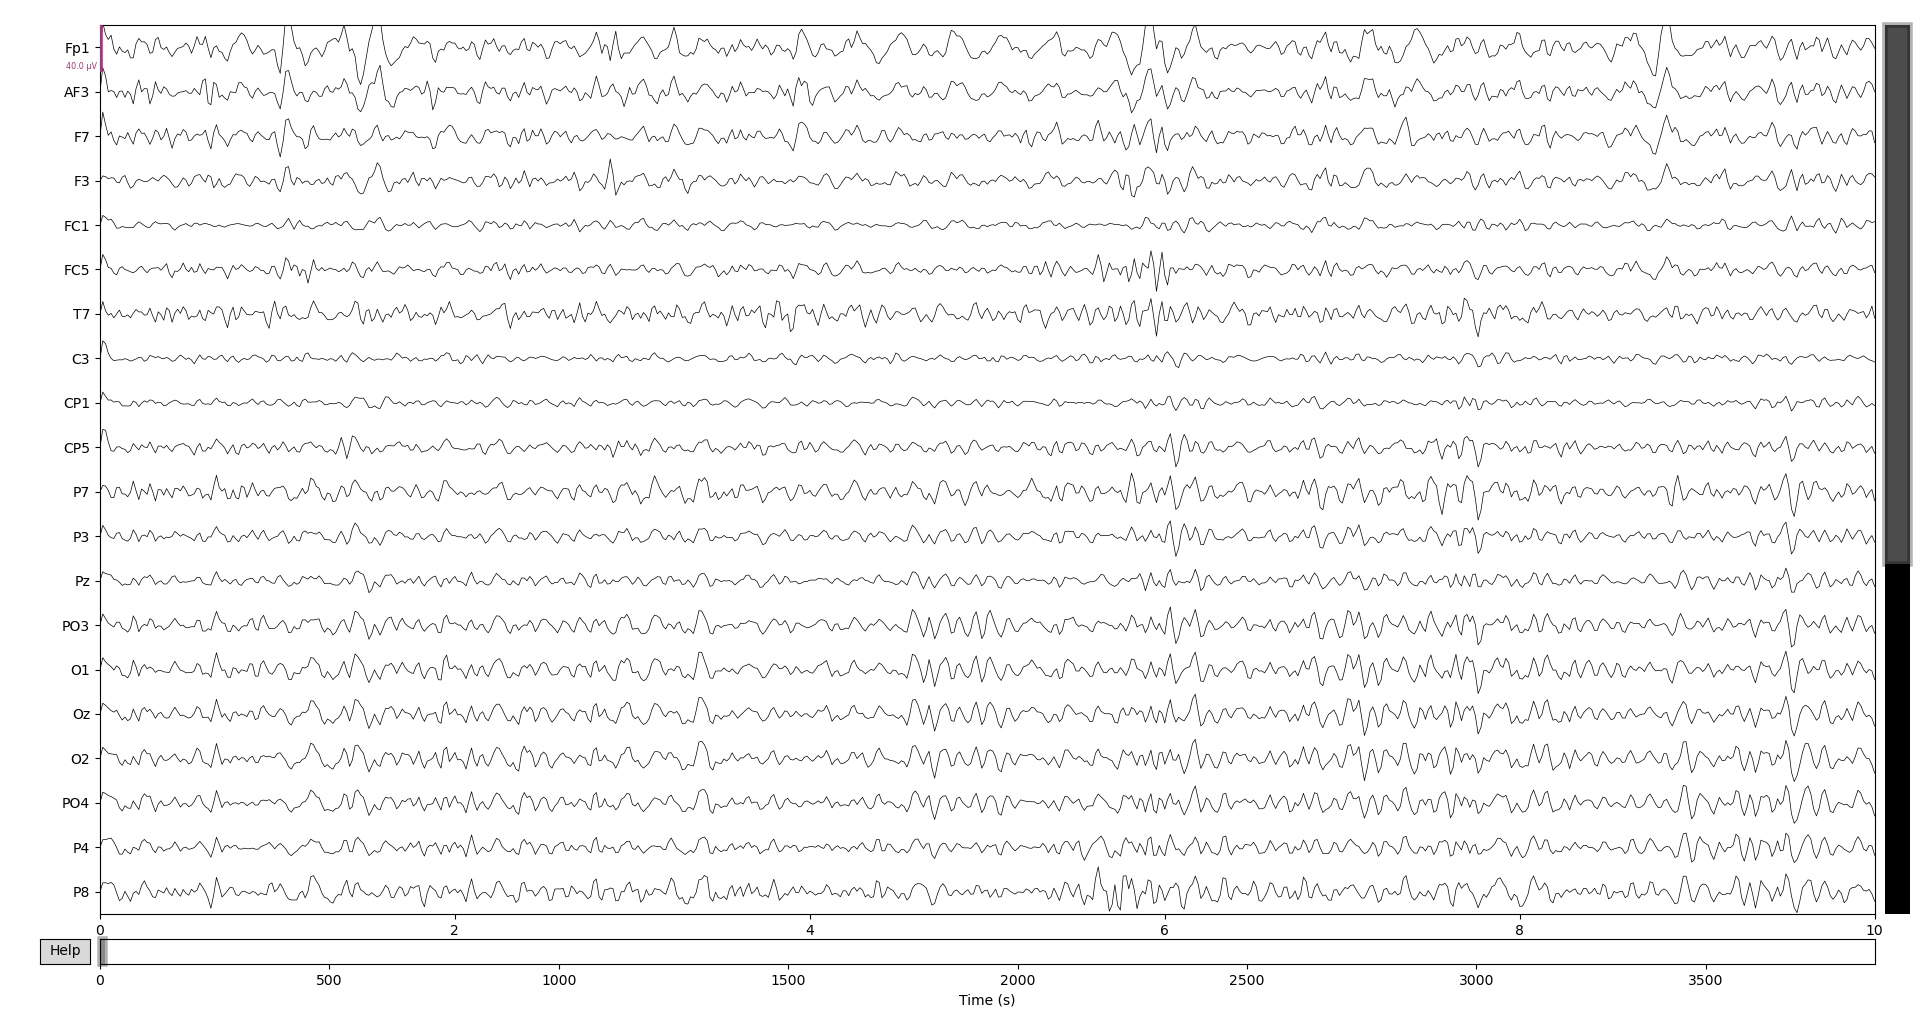

In [47]:
raw_temp.plot();

In [48]:
montage = mne.channels.make_standard_montage("standard_1020")

In [49]:
raw_temp.set_montage(montage)

<RawEDF | s01.bdf, 33 x 1980928 (3869.0 s), ~498.8 MB, data loaded>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


<IPython.core.display.Javascript object>


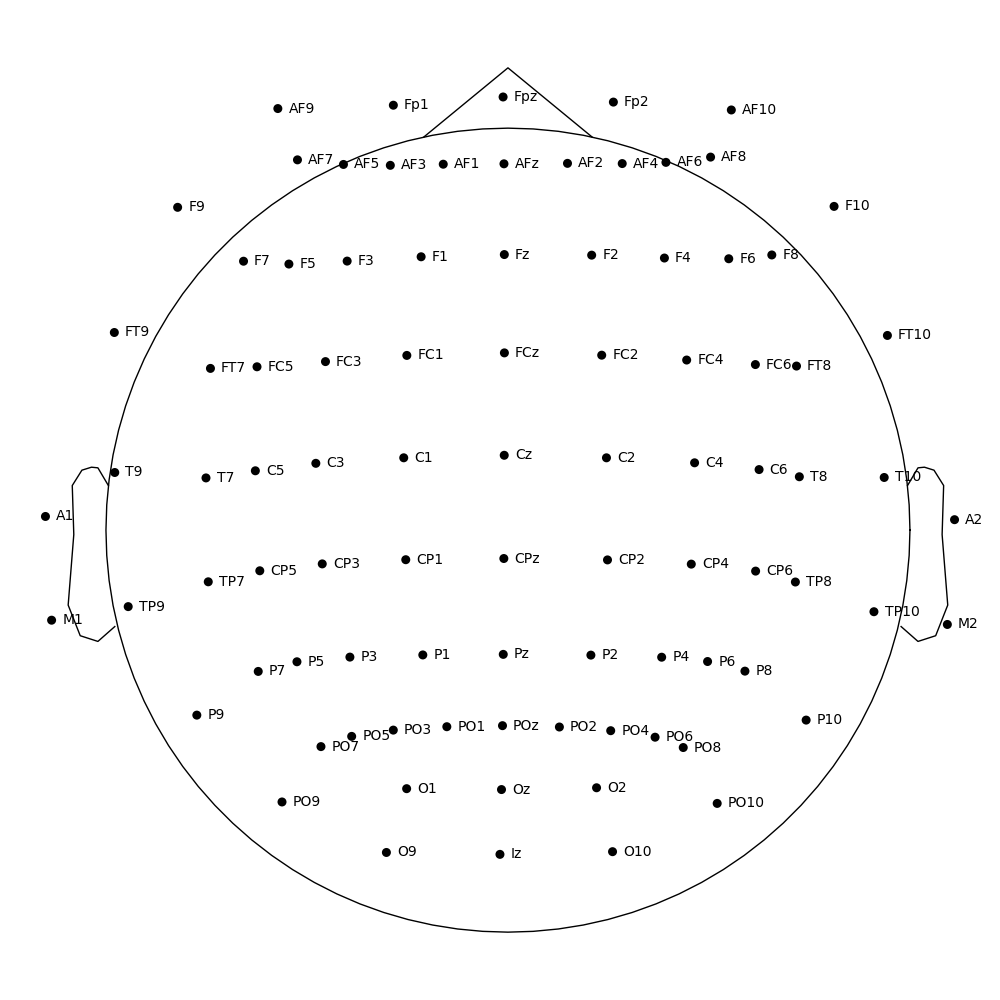

In [50]:
montage.plot();

In [51]:
ica = mne.preprocessing.ICA(n_components=32, random_state=0)

In [52]:
ica.fit(raw_temp.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.6s finished


Selecting by number: 32 components


C:\Users\haide\AppData\Local\Temp\ipykernel_25376\3719462861.py:1: RuntimeWarning: Using n_components=32 (resulting in n_components_=32) may lead to an unstable mixing matrix estimation because the ratio between the largest (29) and smallest (1.3e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 22
  ica.fit(raw_temp.copy().filter(8, 35))


Fitting ICA took 48.2s.


<ICA | raw data decomposition, method: fastica (fit in 39 iterations on 1980928 samples), 32 ICA components (32 PCA components available), channel types: eeg, no sources marked for exclusion>

<IPython.core.display.Javascript object>


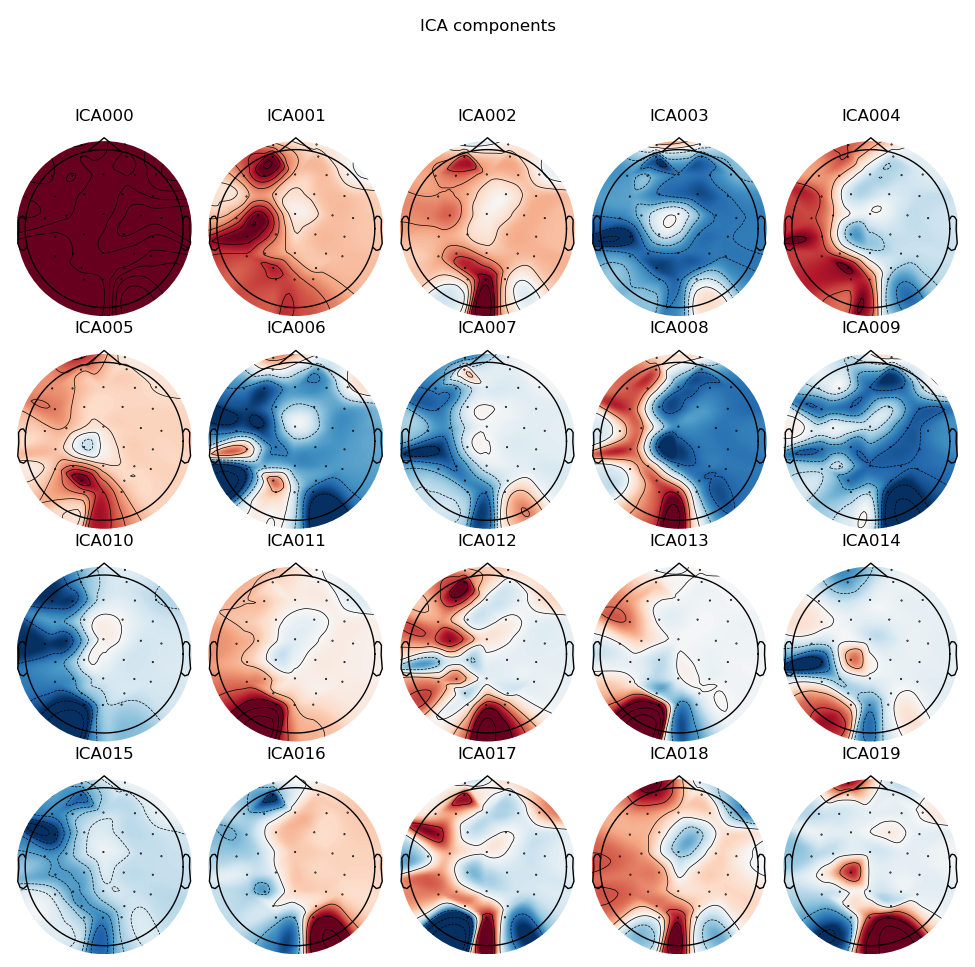

<IPython.core.display.Javascript object>


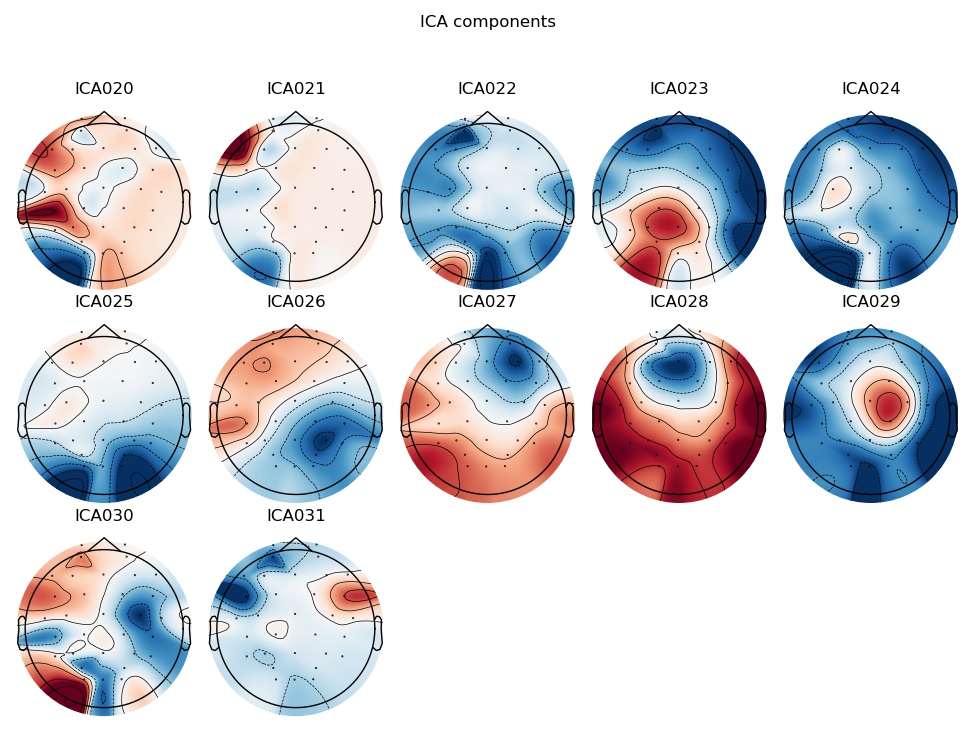

In [53]:
ica.plot_components();

In [54]:
bad_idx, scores = ica.find_bads_eog(raw_temp, 'Status', threshold=2)

Using EOG channel: Status
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [55]:
print(bad_idx)

[26, 23, 31, 30, 22, 27]


Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<IPython.core.display.Javascript object>


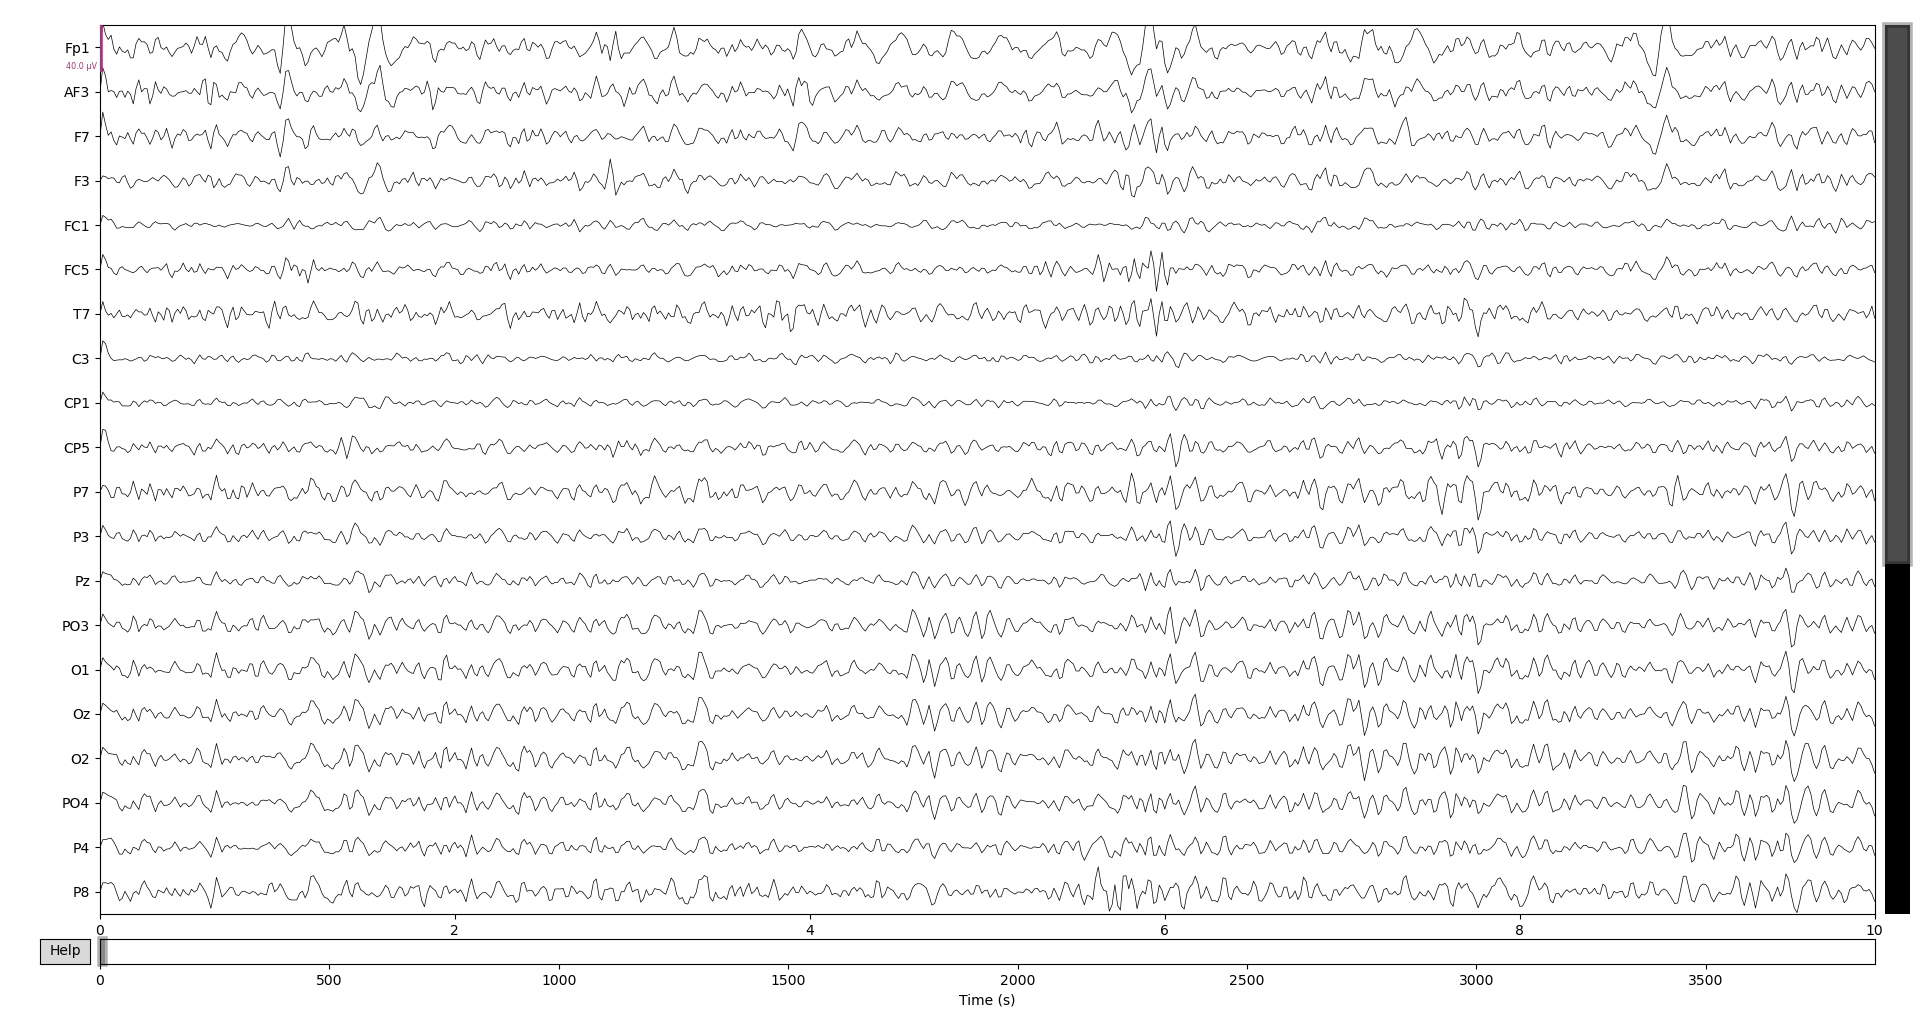

In [56]:
ica.apply(raw_temp.copy(), exclude=ica.exclude).plot();

<IPython.core.display.Javascript object>


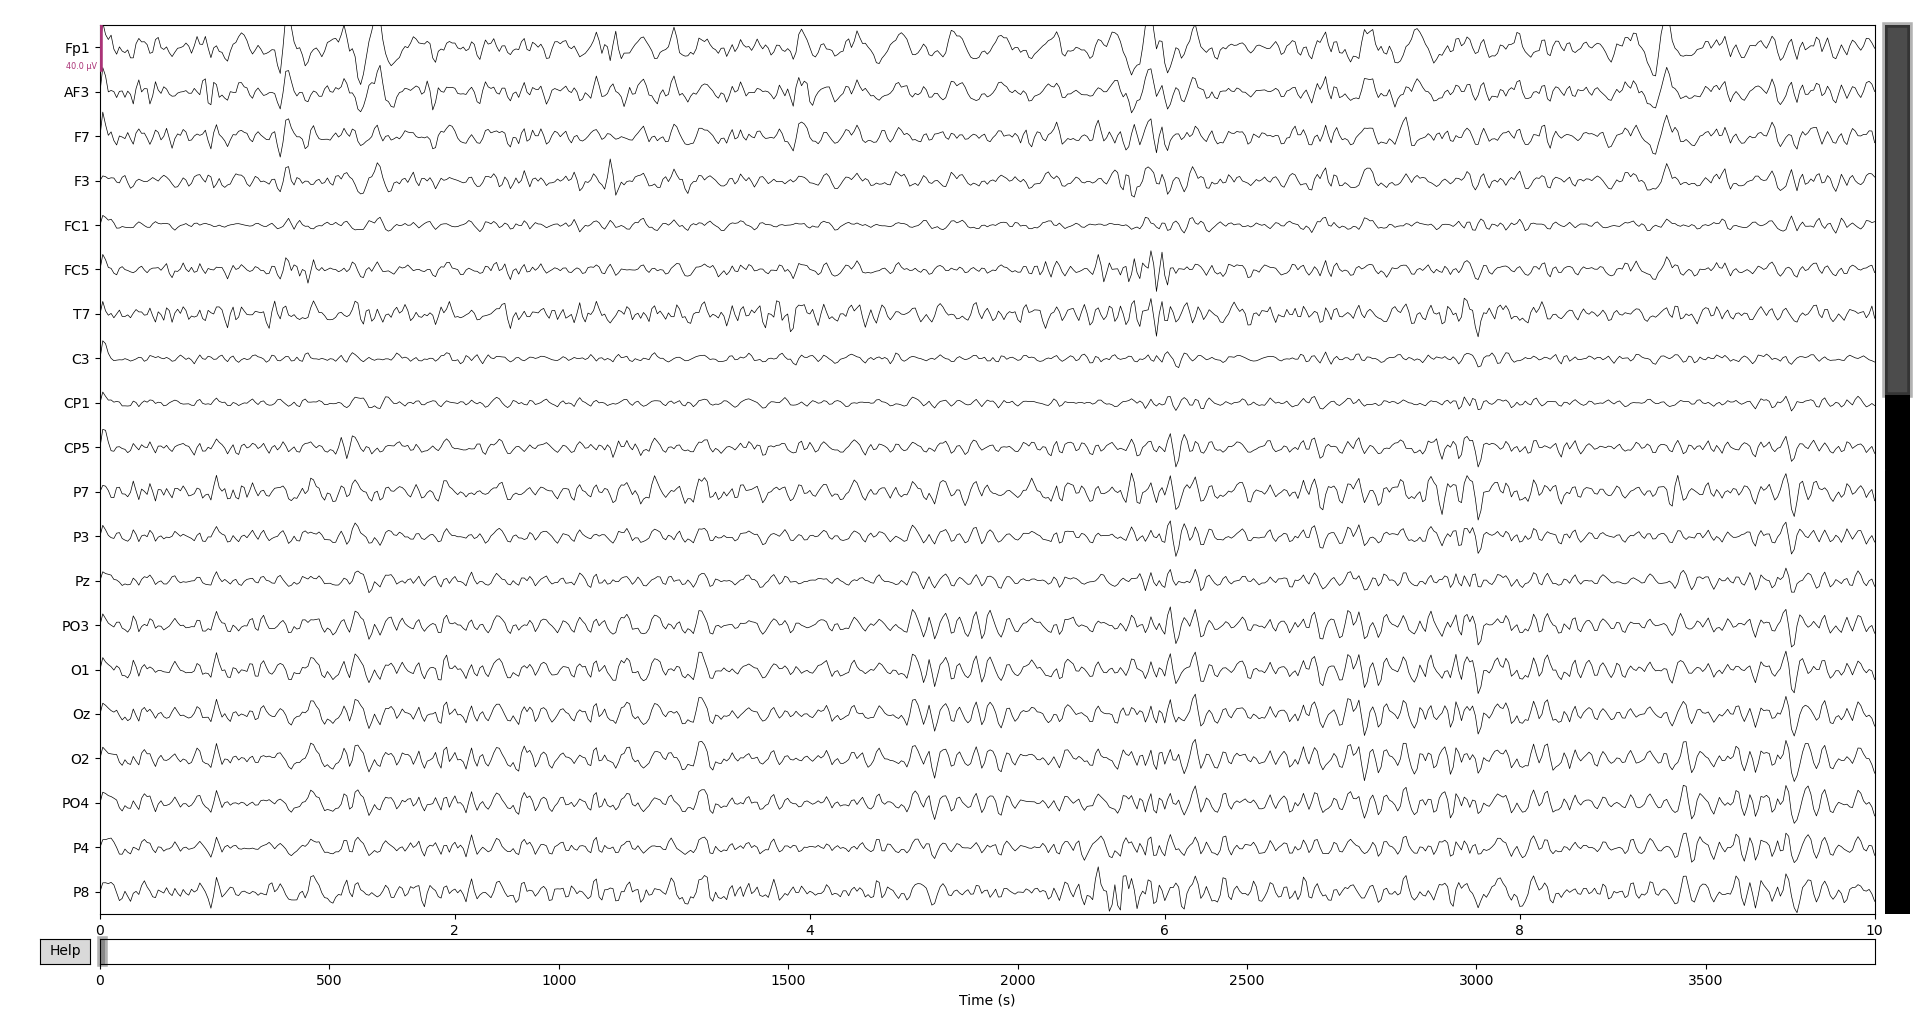

<IPython.core.display.Javascript object>


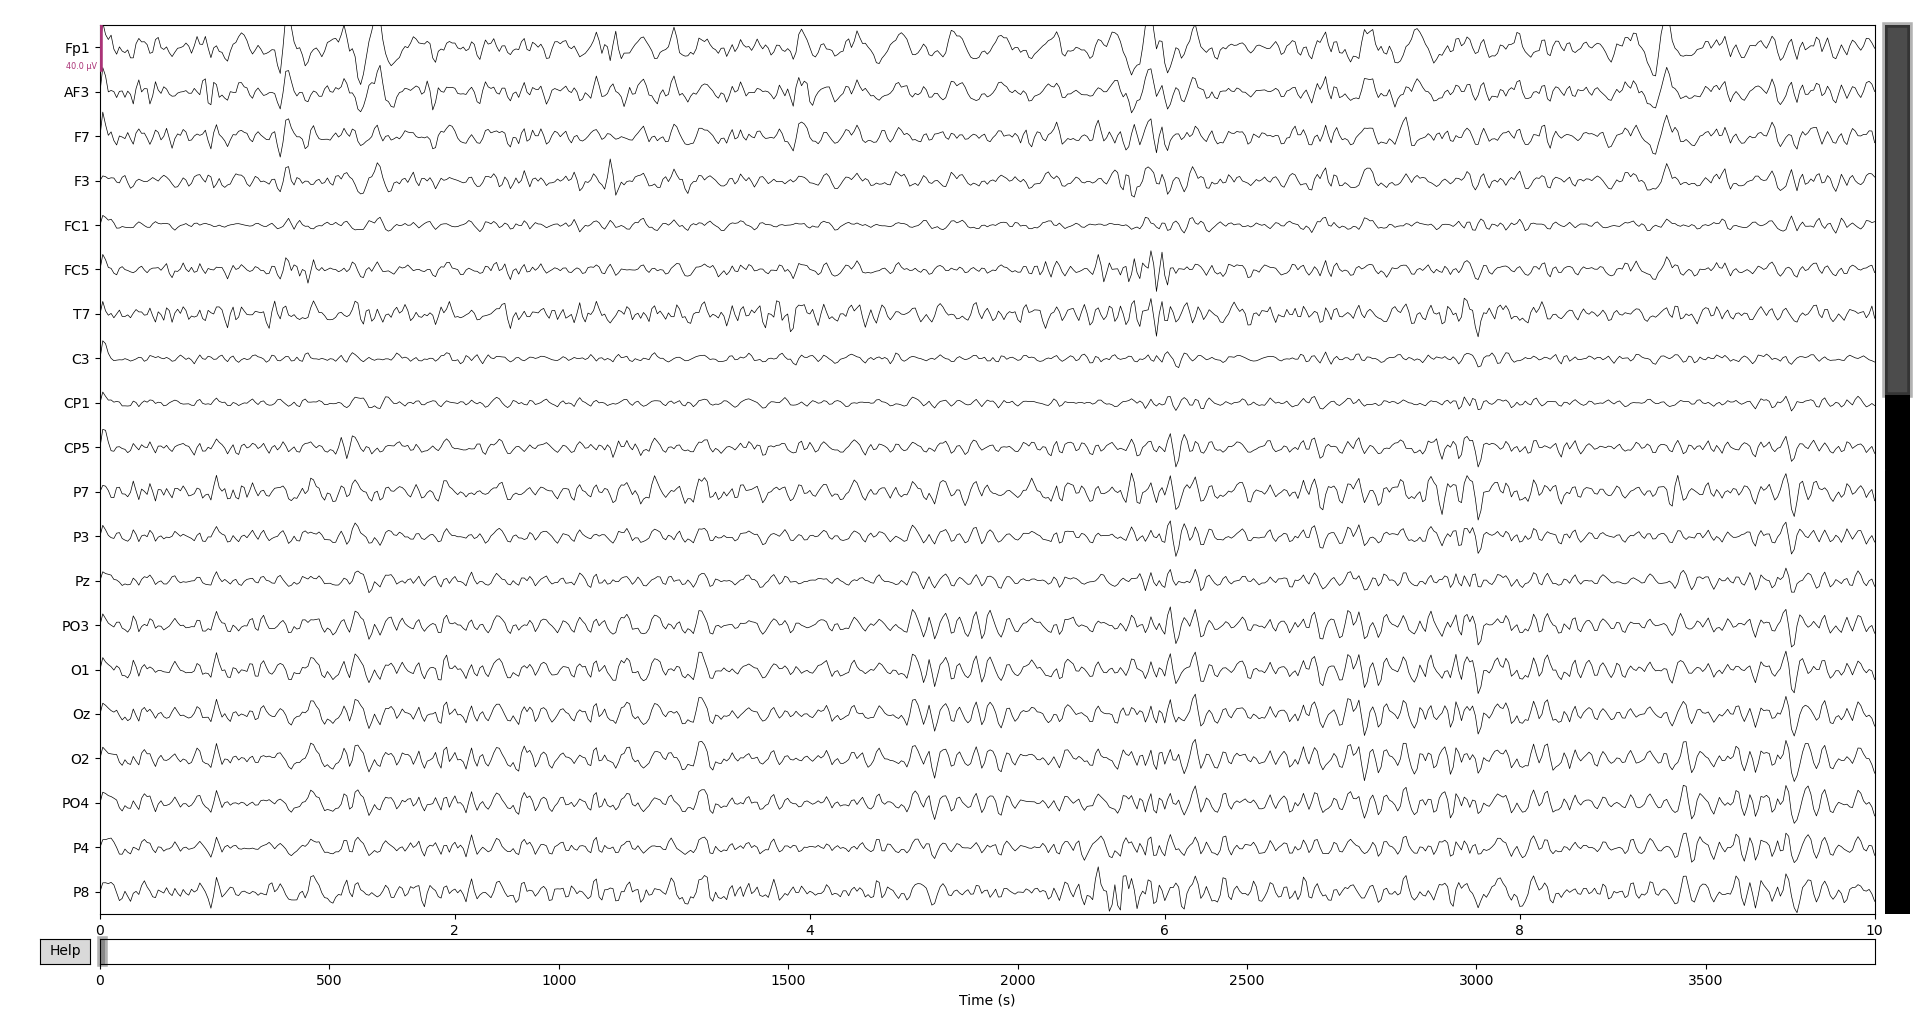

In [57]:
raw.plot()

In [58]:
plt.rcParams["figure.figsize"]=10, 10

In [59]:
events = mne.find_events(raw_temp)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
13760 events found
Event IDs: [1 2 3 4 5 6 7]


In [60]:
events

array([[   1960,       0,       1],
       [   1972,       0,       1],
       [  63424,       0,       2],
       ...,
       [1880153,       0,       1],
       [1880162,       0,       2],
       [1880691,       0,       7]], dtype=int64)

<IPython.core.display.Javascript object>


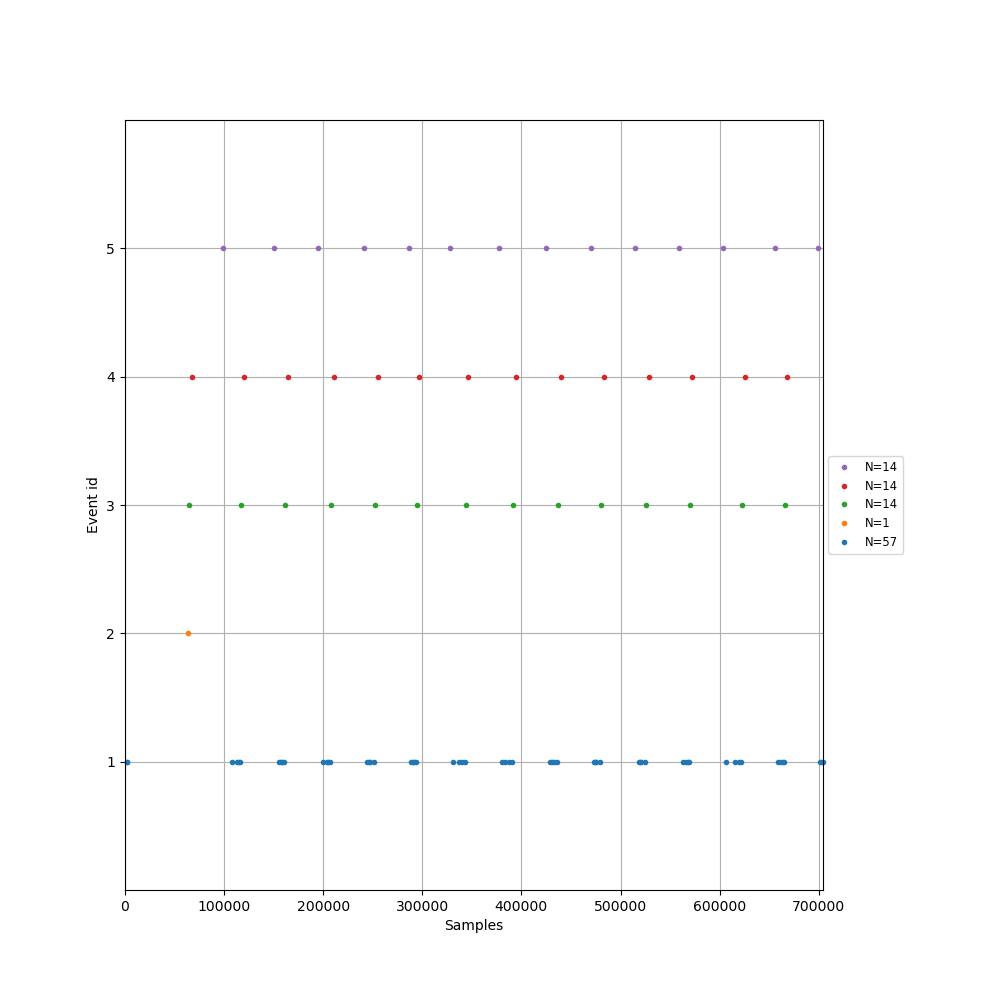

In [61]:
mne.viz.plot_events(events[:100]);

In [62]:
event_ids = {"V1": 1, "V2": 2, "V3": 3, "V4": 4, "V5": 5}

In [63]:
epochs= mne.Epochs(raw_temp, events, event_id=event_ids, preload=True)

Not setting metadata
284 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 284 events and 359 original time points ...
0 bad epochs dropped


You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


<IPython.core.display.Javascript object>


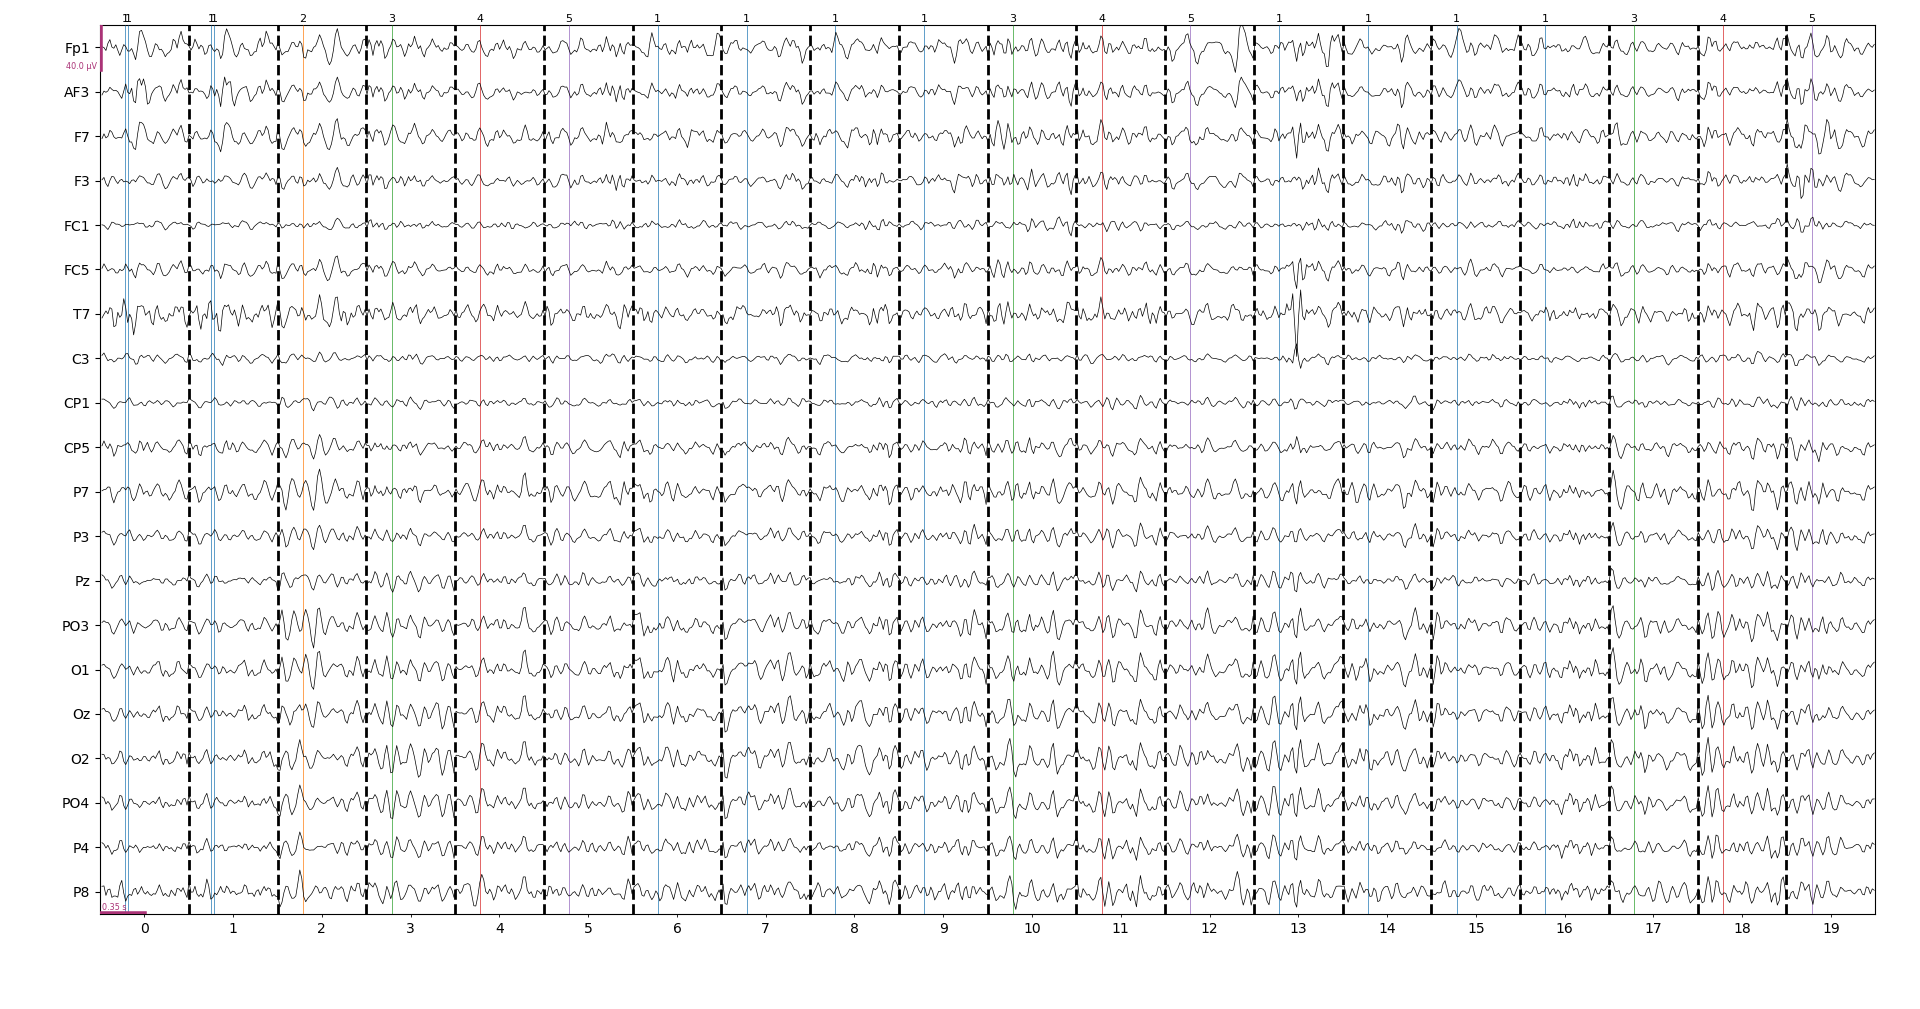

In [64]:
epochs.plot(events=True);

In [65]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


C:\Users\haide\AppData\Local\Temp\ipykernel_25376\3077353632.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [66]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


<Epochs |  284 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~25.7 MB, data loaded,
 'V1': 162
 'V2': 2
 'V3': 40
 'V4': 40
 'V5': 40>

In [67]:
epochs["V2"]

<Epochs |  2 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~228 kB, data loaded,
 'V2': 2>

In [68]:
epochs

<Epochs |  284 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~25.7 MB, data loaded,
 'V1': 162
 'V2': 2
 'V3': 40
 'V4': 40
 'V5': 40>

In [69]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 4.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2010-07-01 10:00:16 UTC
 nchan: 33
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [70]:
plt.rcParams["figure.figsize"]=10, 10

<IPython.core.display.Javascript object>


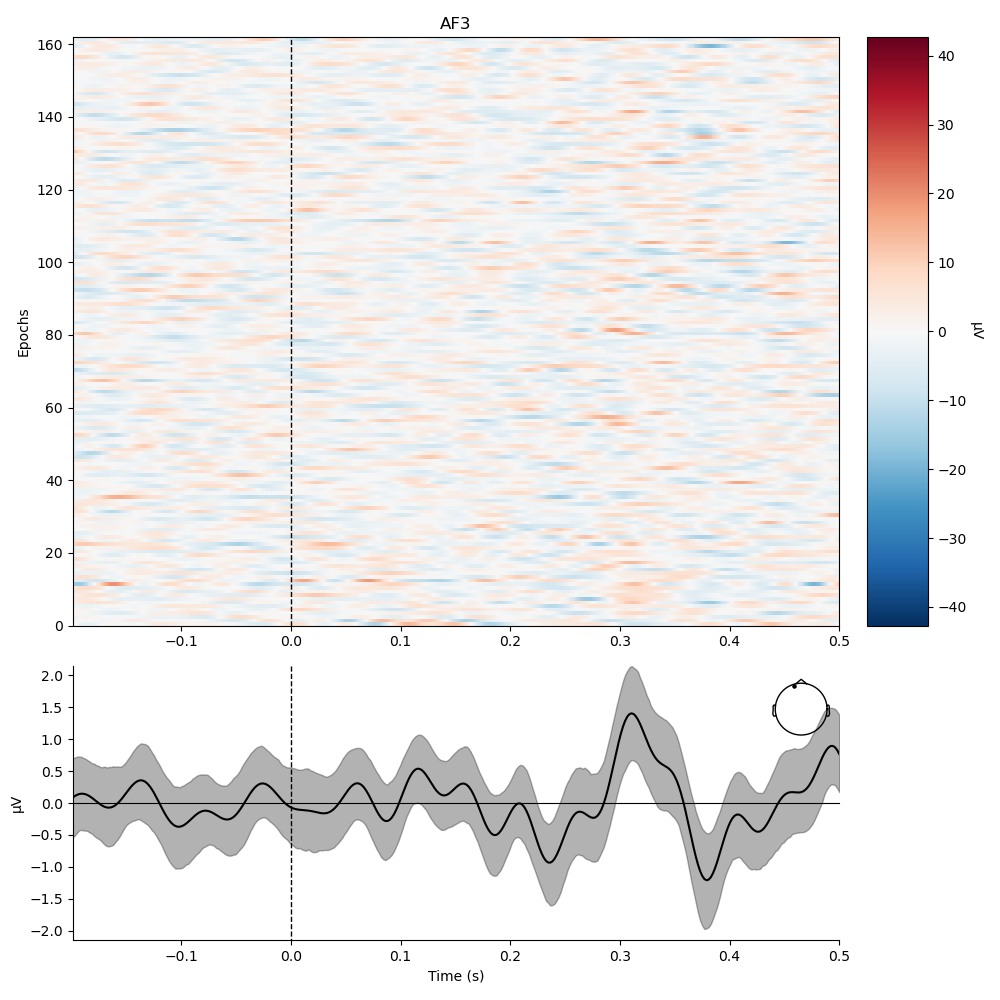

Not setting metadata
162 matching events found
No baseline correction applied
0 projection items activated


In [71]:
epochs["V1"].plot_image(picks=[1]);

<IPython.core.display.Javascript object>


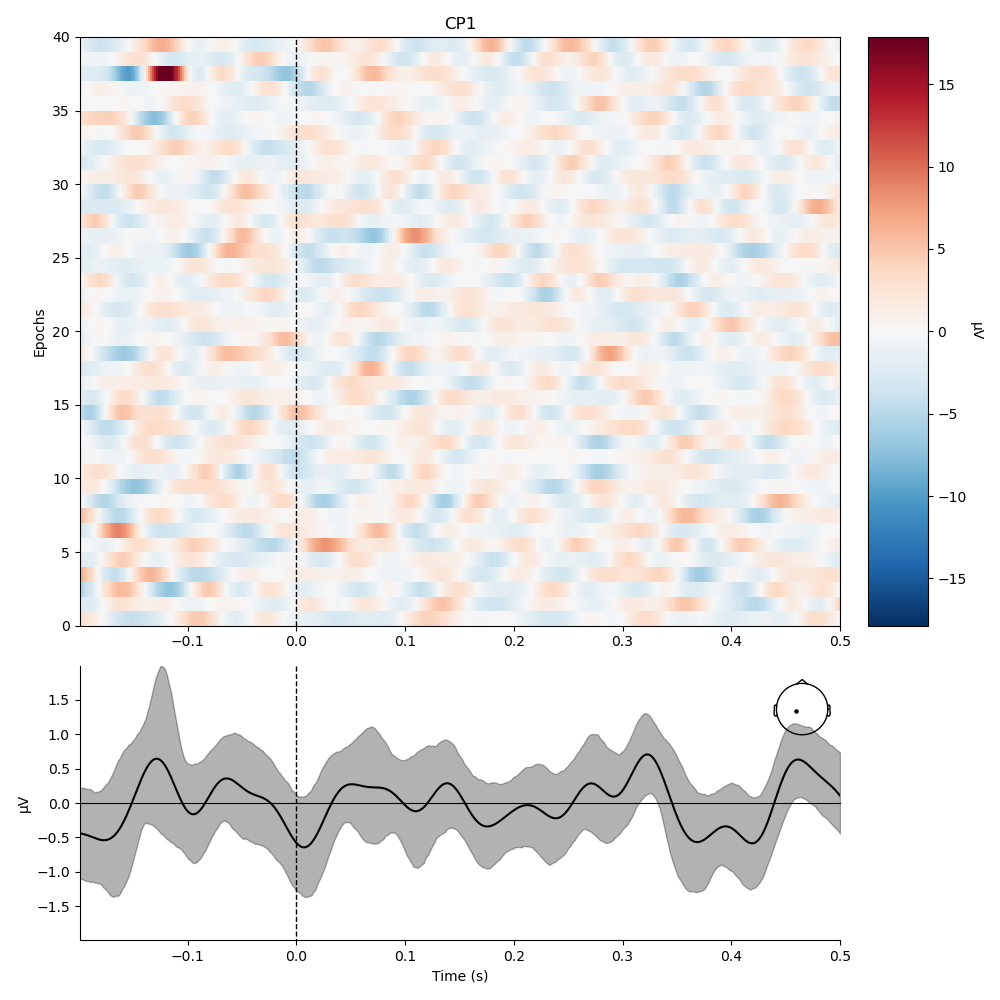

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


In [72]:
epochs["V5"].plot_image(picks=[8]);

In [73]:
epochs.equalize_event_counts(event_ids)

Dropped 274 epochs: 0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

(<Epochs |  10 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~969 kB, data loaded,
  'V1': 2
  'V2': 2
  'V3': 2
  'V4': 2
  'V5': 2>,
 array([  0,   1,   7,   8,   9,  13,  14,  15,  16,  20,  21,  22,  23,
         27,  28,  29,  30,  34,  35,  36,  37,  41,  42,  43,  44,  48,
         49,  50,  51,  55,  56,  57,  58,  62,  63,  64,  65,  69,  70,
         71,  72,  76,  77,  78,  79,  83,  84,  85,  86,  90,  91,  92,
         93,  97,  98,  99, 100, 104, 105, 106, 107, 111, 112, 113, 114,
        118, 119, 120, 121, 125, 126, 127, 128, 132, 133, 134, 135, 139,
        140, 141, 142, 146, 147, 148, 149, 153, 154, 155, 156, 160, 161,
        162, 163, 167, 168, 169, 170, 174, 175, 176, 177, 181, 182, 183,
        184, 188, 189, 190, 191, 195, 196, 197, 198, 202, 203, 204, 205,
        209, 210, 211, 212, 216, 217, 218, 219, 223, 224, 225, 226, 230,
        231, 232, 233, 237, 238, 239, 240, 244, 245, 246, 247, 251, 252,
        253, 254, 258, 259, 260, 261, 265, 2

In [74]:
ls

 Volume in drive C is Desktop 1
 Volume Serial Number is B215-1D64

 Directory of C:\Users\haide\mne-tests\mne-on-Deap\S01

09/25/2023  07:24 PM    <DIR>          .
09/25/2023  03:21 AM    <DIR>          ..
09/24/2023  08:51 PM    <DIR>          .ipynb_checkpoints
04/11/2018  09:15 PM       285,266,176 s01.bdf
09/25/2023  07:24 PM         5,993,462 s01.ipynb
09/23/2023  08:46 PM           660,849 s01-epo.fif
09/25/2023  07:11 PM             3,471 Untitled.ipynb
               4 File(s)    291,923,958 bytes
               3 Dir(s)  149,279,166,464 bytes free


In [118]:
epochs.save("s01-epo.fif")

In [119]:
ls

 Volume in drive C is Acer
 Volume Serial Number is B215-1D64

 Directory of C:\Users\haide\mne-tests\mne-on-Deap

09/23/2023  08:46 PM    <DIR>          .
09/23/2023  07:05 PM    <DIR>          ..
09/23/2023  07:06 PM    <DIR>          .ipynb_checkpoints
09/23/2023  08:46 PM         5,479,656 DEAP-test.ipynb
04/11/2018  09:15 PM       285,266,176 s01.bdf
09/23/2023  08:46 PM           660,849 s01-epo.fif
09/23/2023  07:06 PM                72 Untitled.ipynb
               4 File(s)    291,406,753 bytes
               3 Dir(s)  162,843,475,968 bytes free
